## Import

Obiettivo è confrontare la durata dei film con il rating, se sono correlati

Idea: come per la musica, chi vede i film se sono troppo lunghi o troppo corti ne è influenzato?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframeTitoli = pd.read_csv("./data/title_basics.tsv", sep="\t", low_memory=False)
dataframeRating = pd.read_csv("./data/title_ratings.tsv", sep="\t", low_memory=False)

In [3]:
dataframeRating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1849
1,tt0000002,6.0,241
2,tt0000003,6.5,1616
3,tt0000004,6.0,156
4,tt0000005,6.2,2442


In [4]:
mergedDataframe = pd.merge(dataframeTitoli, dataframeRating, on="tconst")

In [5]:
mergedDataframe.shape

(1206952, 11)

In [6]:
mergedDataframe.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1849
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,241
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1616
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,156
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2442


In [7]:
mergedDataframe.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1849
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,241
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1616
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,156
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2442


## Data Cleaning

In [8]:
mergedDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206952 entries, 0 to 1206951
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1206952 non-null  object 
 1   titleType       1206952 non-null  object 
 2   primaryTitle    1206952 non-null  object 
 3   originalTitle   1206952 non-null  object 
 4   isAdult         1206952 non-null  object 
 5   startYear       1206952 non-null  object 
 6   endYear         1206952 non-null  object 
 7   runtimeMinutes  1206952 non-null  object 
 8   genres          1206950 non-null  object 
 9   averageRating   1206952 non-null  float64
 10  numVotes        1206952 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 110.5+ MB


Check for null values

In [9]:
mergedDataframe.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            2
averageRating     0
numVotes          0
dtype: int64

Dropping unnecessary columns

In [10]:
mergedDataframe = mergedDataframe.drop(['isAdult', 'endYear'], axis=1)

In [11]:
mergedDataframe.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes'],
      dtype='object')

Fix data types

In [12]:
mergedDataframe.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
startYear          object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [13]:
mergedDataframe['titleType'] = pd.Categorical(mergedDataframe['titleType'])

In [14]:
mergedDataframe['titleType'].cat.categories

Index(['movie', 'short', 'tvEpisode', 'tvMiniSeries', 'tvMovie', 'tvSeries',
       'tvShort', 'tvSpecial', 'video', 'videoGame'],
      dtype='object')

Problema dato da caratteri \N presenti nel dataset

In [15]:
mergedDataframe.runtimeMinutes = pd.to_numeric(mergedDataframe.runtimeMinutes, errors ='coerce').fillna(0).astype('int')

In [16]:
mergedDataframe.sort_values(by='runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
1150191,tt8273150,movie,Logistics,Logistics,2012,51420,Documentary,6.1,112
918900,tt3854496,movie,Ambiancé,Ambiancé,2020,43200,Documentary,5.2,77
550886,tt12095652,video,The Longest Video on YouTube: 596.5 Hours,The Longest Video on YouTube: 596.5 Hours,2011,35791,\N,6.8,14
840472,tt2659636,movie,Modern Times Forever,Modern Times Forever,2011,14400,Documentary,6.4,91
532256,tt11707418,tvSpecial,Svalbard Minute by Minute,Svalbard minutt for minutt,2020,13319,"Adventure,Documentary",8.1,21


In [17]:
mergedDataframe.dtypes

tconst              object
titleType         category
primaryTitle        object
originalTitle       object
startYear           object
runtimeMinutes       int32
genres              object
averageRating      float64
numVotes             int64
dtype: object

In [18]:
mergedDataframe.startYear = pd.to_numeric(mergedDataframe.startYear, errors ='coerce').fillna(0).astype('int')

### Modellazione

Risolvo criticità null values

In [19]:
mergedDataframe[mergedDataframe['runtimeMinutes'] == 0].shape

(337321, 9)

Divisione tra movie e altri

In [20]:
FilmDataframe = mergedDataframe[mergedDataframe['titleType'] == "movie"]

In [21]:
FilmDataframe.shape

(273895, 9)

In [22]:
film2 = FilmDataframe[(FilmDataframe['startYear'] == 2021)]

In [23]:
film2 = film2[film2['runtimeMinutes'] != 0]

In [24]:
film2 = film2[film2['numVotes'] > 15000]

In [25]:
film2.shape

(172, 9)

In [26]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230


In [27]:
film2.sort_values(by='runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
562212,tt12361974,movie,Zack Snyder's Justice League,Zack Snyder's Justice League,2021,242,"Action,Adventure,Fantasy",8.1,356311
1191860,tt9389998,movie,Pushpa: The Rise - Part 1,Pushpa: The Rise - Part 1,2021,179,"Action,Adventure,Crime",8.0,33382
476390,tt10579952,movie,Master,Master,2021,179,"Action,Thriller",7.8,67154
526288,tt11580854,movie,Sarpatta Parambarai,Sarpatta Parambarai,2021,173,"Action,Drama,Sport",8.7,19704
460576,tt10280296,movie,Sardar Udham,Sardar Udham,2021,164,"Biography,Crime,Drama",8.7,34851


In [28]:
film2.sort_values(by='runtimeMinutes').head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
529738,tt11657662,movie,The Witcher: Nightmare of the Wolf,The Witcher: Nightmare of the Wolf,2021,83,"Action,Adventure,Animation",7.3,38843
1200187,tt9684220,movie,Bad Trip,Bad Trip,2021,86,Comedy,6.6,22654
1159816,tt8521876,movie,Yes Day,Yes Day,2021,86,"Comedy,Family",5.7,21793
1204761,tt9844522,movie,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,2021,88,"Action,Adventure,Horror",5.8,32122
537390,tt11804152,movie,Till Death,Till Death,2021,88,Thriller,5.9,16696


In [29]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].shape

(79820, 9)

In [30]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].sort_values(by='startYear', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
671473,tt15101670,tvSeries,The Journalist,The Journalist,2022,50,"Drama,Thriller",7.2,176
717512,tt16899450,tvSeries,Indivisible: Healing Hate,Indivisible: Healing Hate,2022,0,Documentary,3.4,72
715364,tt16765650,tvSeries,Predposlednyaya instanciya,Predposlednyaya instanciya,2022,0,Comedy,6.0,6
715010,tt16750516,tvSeries,Guy's Chance of a Lifetime,Guy's Chance of a Lifetime,2022,0,Game-Show,5.1,30
692122,tt15758108,tvSeries,Tokyo Twenty Fourth Ward,Tokyo 24-ku,2022,24,"Animation,Mystery,Sci-Fi",6.5,33


In [31]:
mergedDataframe[(mergedDataframe['titleType'] == "tvSeries") & (mergedDataframe['startYear'] == 1994)].sort_values(by='averageRating', ascending=False).head(20)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
553192,tt12148314,tvSeries,Nokkhotrer Raat,Nokkhotrer Raat,1994,0,"Comedy,Drama,Family",9.5,233
862673,tt3016336,tvSeries,Storie maledette,Storie maledette,1994,0,\N,9.4,12
778625,tt2090741,tvSeries,Chubbies,Bumbari,1994,30,Musical,9.3,12
183430,tt0310342,tvSeries,Weird TV,Weird TV,1994,60,\N,9.3,20
80573,tt0108969,tvSeries,Traps,Traps,1994,60,Drama,9.2,19
463469,tt1033551,tvSeries,Plåstrets pirat-tv,Plåstrets pirat-tv,1994,15,"Comedy,Family",9.2,5
94968,tt0128885,tvSeries,Na Paz dos Anjos,Na Paz dos Anjos,1994,0,\N,9.2,18
588164,tt1298821,tvSeries,Discovering Women,Discovering Women,1994,60,Documentary,9.2,7
126849,tt0191714,tvSeries,Otvorena vrata,Otvorena vrata,1994,30,Comedy,9.1,3932
192690,tt0331400,tvSeries,The Steven Banks Show,The Steven Banks Show,1994,0,\N,9.1,32


In [32]:
mergedDataframe[mergedDataframe['titleType'] == "tvMovie"].shape

(48237, 9)

In [33]:
mergedDataframe[mergedDataframe['titleType'] == "tvMovie"].sort_values(by='startYear', ascending=False).head(10)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
675030,tt15202636,tvMovie,Deadly Ex Next Door,The Lakehouse Murders,2022,85,"Drama,Mystery,Thriller",4.9,73
715270,tt16761900,tvMovie,Jozef Mak,Jozef Mak,2022,120,Drama,7.7,45
705655,tt16316822,tvMovie,"Oskar, das Schlitzohr und Fanny Supergirl","Oskar, das Schlitzohr und Fanny Supergirl",2022,88,"Comedy,Drama,Family",6.1,49
708445,tt16427960,tvMovie,Horst Lichter - Keine Zeit für Arschlöcher,Horst Lichter - Keine Zeit für Arschlöcher,2022,89,"Biography,Drama",5.1,20
636438,tt14124268,tvMovie,Ray Donovan: The Movie,Ray Donovan: The Movie,2022,100,Drama,7.1,2380
704908,tt16287754,tvMovie,The Wedding Veil,The Wedding Veil,2022,84,"Drama,Romance",7.7,773
638860,tt14181388,tvMovie,Prisoner of Love,Prisoner of Love,2022,89,Thriller,4.4,56
704759,tt16282550,tvMovie,Ruposh,Ruposh,2022,142,Drama,8.6,483
712113,tt16606760,tvMovie,"Karla, Rosalie und das Loch in der Wand","Karla, Rosalie und das Loch in der Wand",2022,88,"Comedy,Drama",5.1,10
624769,tt13826702,tvMovie,Where Your Heart Belongs,Where Your Heart Belongs,2022,90,Romance,5.4,343


## DataViz

## Waffle - rapporto tra film e serie tv nel dataset

In [34]:
from pywaffle import Waffle

In [35]:
mergedDataframe[mergedDataframe['titleType'] == "movie"].shape

(273895, 9)

In [36]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].shape

(79820, 9)

In [37]:
num_movie = 241193
num_tvSeries = 65991
tot_df = num_movie + num_tvSeries

In [38]:
perc_films = num_movie / tot_df * 100
print(perc_films)

78.51743580394812


In [39]:
perc_tvs = num_tvSeries / tot_df * 100
print(perc_tvs)

21.48256419605188


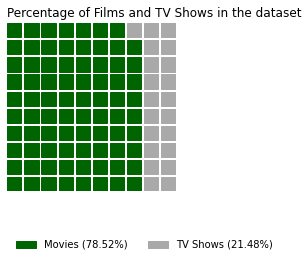

In [40]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the dataset', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

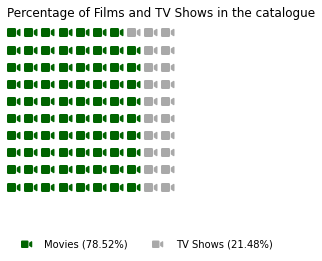

In [41]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the catalogue', 'loc': 'left'},
    icons='video',
    font_size=12,
    icon_legend=True,
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

source code: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

## 1 - correlation btw years and duration of films

correlazione tra anni e durata dei film

domanda di ricerca: come per la musica, è vero che si è ridotta attenzione utenti e dunque si producono film meno lunghi rispetto a prima?

(forse dataset più adatto un archivio di film rispetto a netflix che ha molti film recenti;

inoltre all'inizio non si potevano fare film troppo lunghi per costi e tecnologie, quindi magari indagare trend più recente o spazio temporale ristretto)

In [42]:
film_years = mergedDataframe[(mergedDataframe['titleType'] == "movie") & (mergedDataframe['runtimeMinutes'] != 0) & (mergedDataframe['runtimeMinutes'] <= 400) & (mergedDataframe['numVotes'] >= 500) & (mergedDataframe['startYear'] != 0)][['titleType', 'startYear', 'runtimeMinutes']]

In [43]:
film_years_grouped = film_years.groupby('startYear')['startYear'].count()

In [44]:
film_years.shape

(52490, 3)

In [45]:
film_years_grouped.tail(20)

startYear
2003     891
2004    1080
2005    1146
2006    1300
2007    1326
2008    1335
2009    1469
2010    1426
2011    1534
2012    1664
2013    1783
2014    1896
2015    1917
2016    2009
2017    2135
2018    2149
2019    2102
2020    1403
2021    1191
2022      19
Name: startYear, dtype: int64

In [46]:
import plotly.graph_objects as px
import plotly.express as go

x = film_years['startYear']
y = film_years['runtimeMinutes']

plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='markers',)
])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                step="year",
                stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

plot.show()

#### Line chart anni e durata film ultimi 15 anni

In [47]:
imdb_last15 = mergedDataframe[(mergedDataframe['titleType'] == "movie") & (mergedDataframe['runtimeMinutes'] != 0) & (mergedDataframe['numVotes'] >= 500) & (mergedDataframe['startYear'] > 2006)][['titleType', 'startYear', 'runtimeMinutes']]

In [48]:
imdb_last15_grouped = imdb_last15.groupby('startYear', as_index=False)

In [49]:
imdb_last15.groupby('startYear', as_index=False).size()

,startYear,size
0,2007,1326
1,2008,1335
2,2009,1469
3,2010,1426
4,2011,1534
5,2012,1664
6,2013,1783
7,2014,1896
8,2015,1917
9,2016,2010


In [50]:
mean_15 = imdb_last15_grouped.mean()

In [51]:
mean_15

,startYear,runtimeMinutes
0,2007,103.656863
1,2008,103.695131
2,2009,102.042886
3,2010,103.359748
4,2011,102.626467
5,2012,101.600361
6,2013,102.891195
7,2014,103.360759
8,2015,102.692749
9,2016,103.470149


In [52]:
mean_15.runtimeMinutes = mean_15.runtimeMinutes.round(2)
mean_15.head()

,startYear,runtimeMinutes
0,2007,103.66
1,2008,103.70
2,2009,102.04
3,2010,103.36
4,2011,102.63


<AxesSubplot:xlabel='startYear', ylabel='runtimeMinutes'>

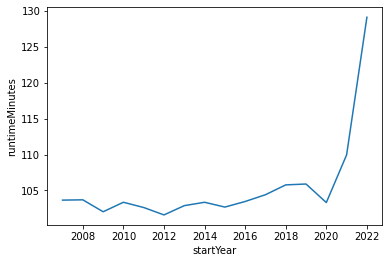

In [53]:
sns.lineplot(data=mean_15, x='startYear', y='runtimeMinutes')

<AxesSubplot:xlabel='startYear', ylabel='runtimeMinutes'>

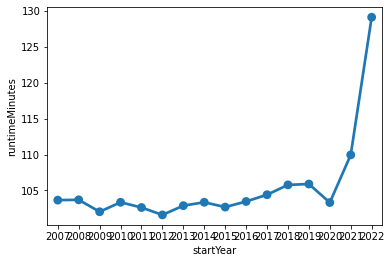

In [54]:
sns.pointplot(data=mean_15, x='startYear', y='runtimeMinutes')

!!! non va bene solo la media 

!!! asse y parte da troppo avanti

## 2 - bar chart difference btw number of movies or tv shows during the years

differenza tra numero di film e numero di serie tv legato all'anno di uscita

In [55]:
clean_df = mergedDataframe[(mergedDataframe['titleType'] == "movie") | (mergedDataframe['titleType'] == "tvSeries")][['titleType', 'startYear', 'runtimeMinutes', 'numVotes']]

In [56]:
clean_df = clean_df[(clean_df['runtimeMinutes'] != 0) & (clean_df['numVotes'] >= 500)][['titleType', 'startYear', 'runtimeMinutes', 'numVotes']]

In [57]:
#creazione nuovo dataframe
dataframe = pd.DataFrame({"startYear":[], "movie": [], "tvSeries":[]})
#ciclo for per ogni classe d'età
for item in clean_df["startYear"].unique():
  #query per identificare i record con punteggio peggiorato per la classe d'età in esame
  queryStringMovies = "startYear == "+str(item)+" and titleType == 'movie'"
  #query per identificare i record con punteggio migliorato per la classe d'età in esame
  queryStringTV = "startYear == "+str(item)+" and titleType == 'tvSeries'"

  #query
  resMovies = clean_df.query(queryStringMovies)
  resTV = clean_df.query(queryStringTV)
  #inserimento nel dataframe del numero di migliorati o peggiorati per la classe d'età in esame
  dataframe.loc[len(dataframe.index)] = [str(item), len(resMovies), len(resTV)]
#ordinamento delle classi d'età
dataframe = dataframe.sort_values("startYear")

dataframe.head()


,startYear,movie,tvSeries
113,0,1.0,0.0
0,1906,1.0,0.0
2,1911,1.0,0.0
1,1912,2.0,0.0
4,1913,8.0,0.0


In [58]:
dataframe['movie'] = dataframe['movie'].astype('float')
dataframe['tvSeries'] = dataframe['tvSeries'].astype('float')

dataframe = pd.eval("delta = dataframe.movie - dataframe.tvSeries", target=dataframe)

In [59]:
dataframe.head(1)

,startYear,movie,tvSeries,delta
113,0,1.0,0.0,1.0


In [60]:
import plotly.express as px
fig = px.line(dataframe, x="startYear", y=["movie", "tvSeries"])
fig.show()

In [61]:
import plotly.express as px
fig = px.line(dataframe, x="startYear", y=["movie", "tvSeries"])
fig.update_xaxes(type="log")
fig.show()

In [62]:
import plotly.express as px
fig = px.line(dataframe, x="startYear", y=["movie", "tvSeries"])
fig.update_xaxes(type="date")
fig.show()

In [63]:
dataframe.dtypes

startYear     object
movie        float64
tvSeries     float64
delta        float64
dtype: object

In [64]:
dataframe['startYear'] = dataframe['startYear'].astype('int')

In [65]:
dataframe.dtypes

startYear      int32
movie        float64
tvSeries     float64
delta        float64
dtype: object

In [66]:
# aggiungo decade al df

dataframe.loc[dataframe['startYear'] <= 1930, 'decade'] = 1930
dataframe.loc[dataframe['startYear'].between(1930,1940), 'decade'] = 1940
dataframe.loc[dataframe['startYear'].between(1940,1950), 'decade'] = 1950
dataframe.loc[dataframe['startYear'].between(1950,1960), 'decade'] = 1960
dataframe.loc[dataframe['startYear'].between(1960,1970), 'decade'] = 1970
dataframe.loc[dataframe['startYear'].between(1970,1980), 'decade'] = 1980
dataframe.loc[dataframe['startYear'].between(1980,1990), 'decade'] = 1990
dataframe.loc[dataframe['startYear'].between(1990,2000), 'decade'] = 2000
dataframe.loc[dataframe['startYear'].between(2000,2010), 'decade'] = 2010
dataframe.loc[dataframe['startYear'].between(2010,2020), 'decade'] = 2020
dataframe.loc[dataframe['startYear'].between(2020,2030), 'decade'] = 2030

In [67]:
dataframe['decade'] = pd.Categorical(dataframe['decade'])

In [68]:
dataframe_10 = dataframe.loc[dataframe['startYear'] >= 2010]

In [69]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_style(style='white')

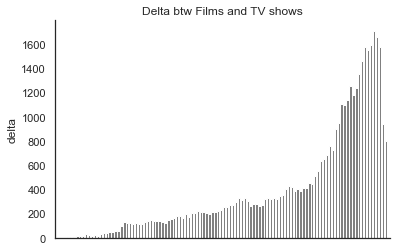

In [70]:
clrs = ['grey' if (x > min(dataframe['delta'])) else 'red' for x in dataframe['delta']]
ax = sns.barplot(x='startYear', y='delta', palette=clrs, data=dataframe)
sns.despine()

ax.set(xticklabels=[])  
ax.set(title='Delta btw Films and TV shows')
ax.set(xlabel=None)
ax.tick_params(bottom=False)  # remove the ticks

[Text(0.5, 1.0, 'Delta btw Films and TV shows')]

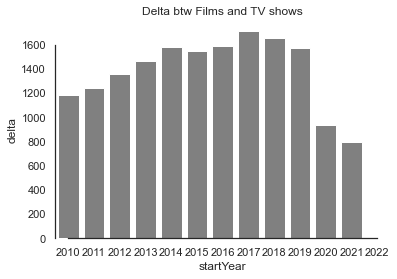

In [71]:
# dataframe_10['dPos'] = dataframe_10['delta'] >= 0
clrs = ['grey' if (x > min(dataframe_10['delta'])) else 'red' for x in dataframe_10['delta']]
ax = sns.barplot(x='startYear', y='delta', palette=clrs, data=dataframe_10)
sns.despine(trim=True)

ax.set(title='Delta btw Films and TV shows')

# IMDB

In [72]:
avg_rating = film2['averageRating'].mean()
avg_rating = avg_rating.round(2)
avg_rating

6.49

In [73]:
avg_minutes = film2['runtimeMinutes'].mean()
avg_minutes = avg_minutes.round(2)
avg_minutes

119.8

In [74]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [75]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet, ColumnDataSource, NumeralTickFormatter, HoverTool
from bokeh.models.callbacks import CustomJS
from bokeh.models import Range1d

datasource = ColumnDataSource(film2)

p = figure(title="Correlazione tra durata (in minuti) e rating medio dei film", x_axis_label="Minuti", y_axis_label="Rating")
p.x_range = Range1d(film2["runtimeMinutes"].min(), film2["runtimeMinutes"].max()) 
p.y_range = Range1d(0, 10) 
tooltips = [
  ('Durata(Min)','@runtimeMinutes'),
  ('Media Voti','@averageRating'),
  ('Titolo','@primaryTitle')
]
p.circle( x="runtimeMinutes", y  = "averageRating", size="size", source=datasource)
p.add_tools(HoverTool(tooltips = tooltips))
riga_avg_rating = Span(location=avg_rating, dimension="width", line_width=3, line_color="#AAAAAA")
riga_avg_minutes = Span(location=avg_minutes, dimension="height", line_width=3, line_color="#AAAAAA")
p.add_layout(riga_avg_rating)
p.add_layout(riga_avg_minutes)
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "size" value "size" [renderer: GlyphRenderer(id='1043', ...)]


In [76]:
# calcolo diametro
import math

def calcola_diametro(numVoti):
    return 2 * math.sqrt(numVoti / math.pi)

In [77]:
film2['size'] = film2.numVotes.apply(func=calcola_diametro)

In [78]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523,449.263567
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938,259.620406
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135,457.146774
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409,451.928182
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230,333.263688


In [79]:
min = film2['size'].min()
min

138.54272314662572

In [80]:
max = film2['size'].max()
max

758.6778814153477

In [81]:
film2['size'] = ((film2['size'] - min) / (max - min) * 10) + 5

In [82]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523,10.010534
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938,6.952440
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135,10.137655
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409,10.053503
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230,8.139976


In [83]:
film2['size'].min()

5.0

In [84]:
film2['size'].max()

15.0

aggiunta colore

In [85]:
# rosso
def get_color(numVoti):
    max2 = film2.numVotes.max()
    min2 = film2.numVotes.min()
    numVoti = int(round((numVoti - min2) / (max2 - min2) * 205 + 50))
    color_string = "#{0:02X}0000".format(numVoti)
    return color_string

In [86]:
# blu
def get_color(numVoti):
    max2 = film2.numVotes.max()
    min2 = film2.numVotes.min()
    numVoti = int(round((numVoti - min2) / (max2 - min2) * 255))
    color_string = "#0000{0:02X}".format(numVoti)
    return color_string

In [87]:
film2['color'] = film2.numVotes.apply(func=get_color)

In [88]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size,color
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523,10.010534,#000054
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938,6.952440,#000016
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135,10.137655,#000057
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409,10.053503,#000055
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230,8.139976,#00002A


In [89]:
runtimeMinutesStandardDeviation = film2["runtimeMinutes"].std()
averageRatingsStandardDeviation = film2["averageRating"].std()

In [90]:

top_rating = avg_rating + averageRatingsStandardDeviation
low_rating = avg_rating - averageRatingsStandardDeviation
top_minutes = avg_minutes + runtimeMinutesStandardDeviation
low_minutes = avg_minutes - runtimeMinutesStandardDeviation
print(top_rating)
print(low_rating)

7.649537581875107
5.330462418124894


In [93]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout, row, column
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet, ColumnDataSource, NumeralTickFormatter, HoverTool, Rect, BoxAnnotation, LabelSet, Title
from bokeh.models.callbacks import CustomJS
from bokeh.models import Range1d, LinearColorMapper, ColorBar
import iqplot
datasource = ColumnDataSource(film2)

p = figure(title="Correlazione tra durata (in minuti) e rating medio dei film", x_axis_label="Durata (Minuti)", y_axis_label="Rating", width=600)
# p.x_range = Range1d(film2["runtimeMinutes"].min(), film2["runtimeMinutes"].max()) 
p.y_range = Range1d(0, 10) 
tooltips = [
  ('Durata(Min)','@runtimeMinutes'),
  ('Media Voti','@averageRating'),
  ('Titolo','@primaryTitle')
]
riga_avg_rating = Span(location=avg_rating, dimension="width", line_width=3, line_color="#AAAAAA")
riga_avg_minutes = Span(location=avg_minutes, dimension="height", line_width=3, line_color="#AAAAAA")
p.circle(line_width=0, x="runtimeMinutes", y="averageRating", size="size", fill_color="color", line_color="white", source=datasource)
p.add_tools(HoverTool(tooltips = tooltips))

p.add_layout(riga_avg_rating)
p.add_layout(riga_avg_minutes)
#bande deviazione standard
bandaRating =  BoxAnnotation(bottom=low_rating, top=top_rating, fill_alpha=0.1, fill_color='#0072B2')
p.add_layout(bandaRating)
bandaMinutes =  BoxAnnotation(left=low_minutes, right=top_minutes, fill_alpha=0.1, fill_color='#0072B2')
p.add_layout(bandaMinutes)
#Labels
labelsData = pd.DataFrame(dict(x = [242,125, 89, 164, 163], y=[8.10, 1.5, 8.2, 9.3, 5.2], text=["Zack Snyder's Justice League","The cost of deception","Seaspiracy", "Jai Bihim", "Toofaan"]))
etichette = LabelSet(x="x",x_offset = 5, y = "y",y_offset = -10, text = "text", source=ColumnDataSource(labelsData), )
p.add_layout(etichette)
#Box PLot minutes
q1 = film2.runtimeMinutes.quantile(q=0.25)
q2 = film2.runtimeMinutes.quantile(q=0.5)
q3 = film2.runtimeMinutes.quantile(q=0.75)
qmin = film2.runtimeMinutes.quantile(q=0.00)
qmax = film2.runtimeMinutes.quantile(q=1.00)
iqr = q3 - q1
upper = film2.runtimeMinutes.max()
lower = film2.runtimeMinutes.min()
s2 = figure(x_axis_label="Minuti", y_axis_label="Rating")
s2.segment(x0 = 2, x1 = 3, y0= lower, y1=lower , line_width=2, line_color="black")
s2.segment(x0 = 2, x1 = 3, y0= upper, y1=upper , line_width=2, line_color="black")
s3 = iqplot.strip(data=film2.runtimeMinutes.values,  jitter=True,
    marker_kwargs=dict(alpha=0.5),
    frame_height=50, frame_width=590)
s4 = iqplot.strip(data=film2.averageRating.values,  jitter=True,q_axis="y",
  marker_kwargs=dict(alpha=0.5),
  frame_height=590, frame_width=50)
rettangolo = Rect(x = 2.5, y= (q3 + q1)/2, width= 3, height=q3-q1, fill_color="#cab2d6")

rettangolo1 =  Rect(x = 2.5, y= (lower + q1)/2, width= 0.01, height=q1-lower, fill_color="black")
rettangolo2 =  Rect(x = 2.5, y= (upper + q3)/2, width= 0.01, height=upper-q3, fill_color="black")

s3.axis.visible=False
s3.xgrid.grid_line_color = None
s3.ygrid.grid_line_color = None
s3.height=50
s3.toolbar.logo = None
s3.toolbar_location = None
s3.toolbar.active_drag = None
s3.toolbar.active_scroll = None
s3.toolbar.active_tap = None

s4.axis.visible=False
s4.xgrid.grid_line_color = None
s4.ygrid.grid_line_color = None
s4.height=50
s4.toolbar.logo = None
s4.toolbar_location = None
s4.toolbar.active_drag = None
s4.toolbar.active_scroll = None
s4.toolbar.active_tap = None
#---------------------------
mapper = LinearColorMapper(palette=film2.color.sort_values(), low=film2.numVotes.min(), high=film2.numVotes.max())
color_bar = ColorBar(color_mapper=mapper, width=300, height=20, orientation='horizontal', major_label_overrides={'100000':'100K', '200000':'200K', '300000':'300K', '400000':'400K'})
p.add_layout(color_bar, "below")
p.add_layout(Title(text="Fonte IMDb", text_font_size="10pt", align="right", ), "below")
show(row(s4, column (p, s3)))

In [92]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout, row, column
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet, ColumnDataSource, NumeralTickFormatter, HoverTool, Rect
from bokeh.models.callbacks import CustomJS
from bokeh.models import Range1d, LinearColorMapper, ColorBar
import iqplot
import bokeh
datasource = ColumnDataSource(film2)

p = figure(title="Correlazione tra durata (in minuti) e rating medio dei film", x_axis_label="Minuti", y_axis_label="Rating")
# p.x_range = Range1d(film2["runtimeMinutes"].min(), film2["runtimeMinutes"].max()) 
p.y_range = Range1d(0, 10) 
tooltips = [
  ('Durata(Min)','@runtimeMinutes'),
  ('Media Voti','@averageRating'),
  ('Titolo','@primaryTitle')
]
p.circle(line_width=0, x="runtimeMinutes", y="averageRating", size="size", fill_color="color", line_color="white", source=datasource)
p.add_tools(HoverTool(tooltips = tooltips))
riga_avg_rating = Span(location=avg_rating, dimension="width", line_width=3, line_color="#AAAAAA")
riga_avg_minutes = Span(location=avg_minutes, dimension="height", line_width=3, line_color="#AAAAAA")
p.add_layout(riga_avg_rating)
p.add_layout(riga_avg_minutes)
#Box PLot minutes
q1 = film2.runtimeMinutes.quantile(q=0.25)
q2 = film2.runtimeMinutes.quantile(q=0.5)
q3 = film2.runtimeMinutes.quantile(q=0.75)
qmin = film2.runtimeMinutes.quantile(q=0.00)
qmax = film2.runtimeMinutes.quantile(q=1.00)
iqr = q3 - q1
upper = film2.runtimeMinutes.max()
lower = film2.runtimeMinutes.min()
s2 = figure(x_axis_label="Minuti", y_axis_label="Rating")

# s2.segment(x0 = 2, x1 = 3, y0= lower, y1=lower , line_width=2, line_color="black")
# s2.segment(x0 = 2, x1 = 3, y0= upper, y1=upper , line_width=2, line_color="black")
s3 = iqplot.strip(data=film2.runtimeMinutes.values,  jitter=True,
    marker_kwargs=dict(alpha=0.5),
    frame_width=500)
# rettangolo = Rect(x = 2.5, y= (q3 + q1)/2, width= 3, height=q3-q1, fill_color="#cab2d6")

# rettangolo1 =  Rect(x = 2.5, y= (lower + q1)/2, width= 0.01, height=q1-lower, fill_color="black")
# rettangolo2 =  Rect(x = 2.5, y= (upper + q3)/2, width= 0.01, height=upper-q3, fill_color="black")
# s2.add_glyph(rettangolo)
# s2.add_glyph(rettangolo1)
# s2.add_glyph(rettangolo2)
# s2.axis.visible=False
# s2.xgrid.grid_line_color = None
# s2.ygrid.grid_line_color = None
# s2.width=150
# s2.toolbar.logo = None
# s2.toolbar_location = None
# s2.toolbar.active_drag = None
# s2.toolbar.active_scroll = None
# s2.toolbar.active_tap = None

# #---------------------------
# mapper = LinearColorMapper(palette=film2.color.sort_values(), low=film2.numVotes.min(), high=film2.numVotes.max())
# color_bar = ColorBar(color_mapper=mapper, width=350, height=20, orientation='horizontal', major_label_overrides={'100000':'100K', '200000':'200K', '300000':'300K', '400000':'400K'})
# p.add_layout(color_bar, "below")
show(p)